In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from extra_functions.functions import visualize

In [2]:
alijah_data_url = 'https://raw.githubusercontent.com/oconnoag/NHANES_Data/master/compiled_data/alijah_raw_compiled.csv'
raw_data = pd.read_csv(alijah_data_url)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 19 columns):
SEQN        6744 non-null float64
HSD010      6166 non-null float64
HSQ500      6166 non-null float64
LBXTST      6235 non-null float64
LBXEST      6186 non-null float64
LBXSHBG     6039 non-null float64
LBXGH       6326 non-null float64
LBXSBU      6255 non-null float64
LBXSC3SI    6257 non-null float64
LBXSCA      6257 non-null float64
LBXSCH      6254 non-null float64
LBXSCLSI    6257 non-null float64
LBXSGL      6257 non-null float64
LBXSIR      6253 non-null float64
LBXSKSI     6257 non-null float64
LBXSNASI    6257 non-null float64
LBXSTP      6253 non-null float64
LBXSTR      6254 non-null float64
LBXSUA      6254 non-null float64
dtypes: float64(19)
memory usage: 1001.1 KB


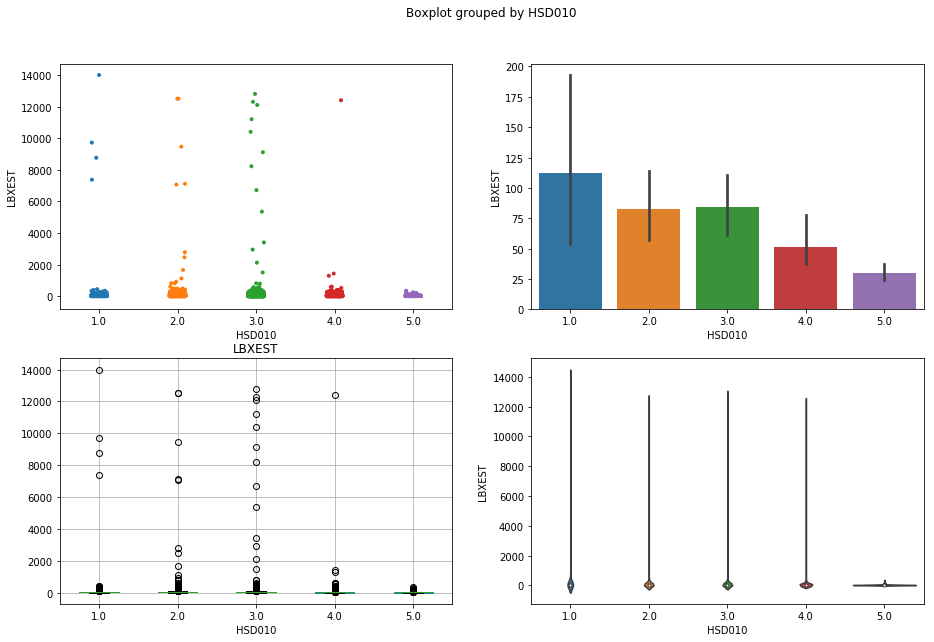

In [4]:
visualize(raw_data, 'HSD010', 'LBXEST')